<a href="https://colab.research.google.com/github/nahbos/AUT-Fundamental-Statistical-Learning/blob/main/HW02/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sobhan Moradian Daghigh

- 12-23-2022

### Ex02 - Q3

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import random
from scipy.stats import norm
import pandas as pd
import math

In [13]:
!wget -nc https://raw.githubusercontent.com/nahbos/AUT-Fundamental-Statistical-Learning/main/HW02/Datasets/earthquake%20fiji/quakes.csv
!wget -nc https://raw.githubusercontent.com/nahbos/AUT-Fundamental-Statistical-Learning/main/HW02/Datasets/old%20Faithful/faithful.csv

File ‘quakes.csv’ already there; not retrieving.

File ‘faithful.csv’ already there; not retrieving.



In [14]:
data = pd.read_csv('./quakes.csv', sep=',')
data.head()

,Unnamed: 0,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11


## a.

In [15]:
r = np.array(data['mag'])

In [16]:
n = len(r)
alpha = 0.05
epsilon = math.sqrt((1 / (2 * n)) * math.log(2 / alpha))

In [17]:
F_n = lambda x : sum(r < x) / n
L_n = lambda x : max(F_n(x) - epsilon, 0)
U_n = lambda x : min(F_n(x) + epsilon, 1)

In [18]:
xx = sorted(r)
df = pd.DataFrame({'x': xx, 'F_n': np.array(list(map(F_n, xx))), 'U_n': np.array(list(map(U_n, xx))), 'L_n': np.array(list(map(L_n, xx)))})

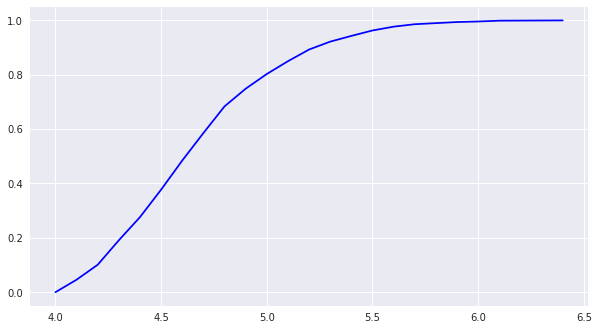

In [19]:
with plt.style.context('seaborn'):
  plt.figure(figsize=(10, 5.5))
  plt.plot('x', 'F_n', data=df, color='blue')

## b.

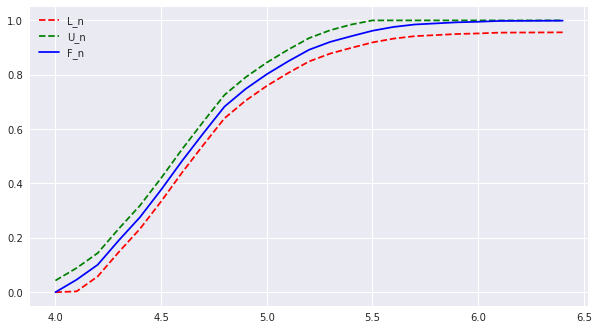

In [20]:
with plt.style.context('seaborn'):
  plt.figure(figsize=(10, 5.5))
  plt.plot('x', 'L_n', data=df, color='red', linestyle='dashed')
  plt.plot('x', 'U_n', data=df, color='green', linestyle='dashed')
  plt.plot('x', 'F_n', data=df, color='blue')
  plt.legend()

In [21]:
z_95 = norm.ppf(.975)
theta = F_n(4.9) - F_n(4.3)
se = math.sqrt(theta * (1 - theta) / n)

print('  |_ Normal:     95%% confidence interval is (%.3f, %.3f)' % ((theta - z_95 * se), (theta + z_95 * se)))

  |_ Normal:     95% confidence interval is (0.526, 0.588)


Finito